# A3

# TO FIX
- ask for permission for microphone
- fix playsound crashing problem
- fix arrow jumping rate

# TO SOLVE
- how to play midi
- how to generate a midi file on the fly (for chord pratice)
- how to make current playing note from midi and current displaying (internal notes) synchronized (for song practice)

# TODO (functionality)
- play correct
  - play check mark sound then, then correct sound(toggle)
  - change background colour to different colour
- can play (multiple) notes by midi
- interval practice mode
  - IntervalPracticeFilter filter
  - play sound, long press, short tap
- triad practice mode
  - ChordPracticeFilter filter
  - play sound, long press, short tap
- Global Settings
  - setting page
    - least stable time
    - error allowance rate
    - second rate
    - debugging mode
    - auto playback answer  when correct
  - save config when closed the app, reload it when open the app
- song practice mode
  - songPlayingSubmode
  - songPracticeSubmode
  - Library page
- store history of played notes
  - database of notes
  - SUMMARY page
    - report top/bottom 10 notes
    - a sentence to cheer up user

# User Experience improvement

In [1]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import Network as Network
import copy

# Q1: Vanishing Gradient

## (a)

Since we use logistic activation function,
$$
\begin{align}
\sigma(z) = \frac{1}{1+e^{-z}} 
\qquad
\sigma\prime(z) =\frac{e^{-z}}{\left(1+ e^{-z} \right)^2} 
\end{align}
$$
Since
$$
\begin{align}
\mid w\sigma\prime(wh+b)\mid\ &\geq1\\
\mid w \frac{e^{-wh-b}}{(1+e^{-wh-b})^2}\mid\ &\geq1 
\end{align}
$$
Let $x=e^{-wh-b}$, x > 0 since $e^{-wh-b} > 0$. So
$$ 
\begin{align}
\mid w \frac{x}{(1+x)^2}\mid \ &\geq 1 \\
\mid wx\mid &\geq (1+x)^2 \qquad\textrm{since } (1+x)^2 \geq0 \\
\mid w\mid &\geq \frac{1+x^2+2x}{x} \qquad\textrm{since } x >0 \\
\mid w\mid &\geq \frac{1}{x} +x+2 
\end{align}
$$
$$
\begin{align}
&\textrm{Let } y(x)=\frac{1}{x} +x, \textrm{ so } y\prime(x)=1-\frac{1}{x^2}. \\
&\textrm{While } x\in(0,1),\ y\prime(x) < 0; \\
&\textrm{While } x\in(1,\infty),\ y\prime(x) > 0.\\
&\textrm{So } y(x) \textrm{ is minimum at } x=1, \textrm{which is }y(1)=2 \\
&\textrm{So} \mid w\mid \ \geq2+2 \\
&\mid w\mid \ \geq4
\end{align}
$$

## (b)

We know $\mid w \sigma\prime(wh+b)\mid\ \geq1$ and $ \mid w\mid \ \geq4$, so
$$
\begin{align}
\mid w \frac{e^{-wh-b}}{(1+e^{-wh-b})^2} \ &\geq 1 \\
\mid w \frac{1}{e^{wh+b}}\mid\ &\geq (1+e^{-wh-b})^2 \\
\mid w \frac{1}{e^{wh+b}} \mid\ &\geq (\frac{e^{wh+b}+1}{e^{wh+b}})^2 \\
\textrm{multiply $(e^{wh+b})^2$ to both sides} \\
\mid we^{wh+b} \mid \ &\geq (e^{wh+b}+1)^2 \\
\mid w\mid e^{wh+b}\ &\geq (e^{wh+b} + 1)^2 \\
0 &\geq (e^{wh+b})^2 +(2-\mid w\mid)e^{wh+b} +1 
\end{align}
$$
Since $\mid w\mid \geq4$, we have $\sqrt{(2-\mid w\mid)^2 -4} \geq0$. We can get the root of above equation: 
$$
\begin{align}
Root = \frac{\mid w\mid -2 \pm\sqrt{(2-\mid w\mid)^2-4}}{2} 
\end{align}
$$
So 
$$
\begin{align}
\frac{\mid w\mid -2-\sqrt{(2-\mid w\mid)^2-4)}}{2} &\leq e^{wh+b} \leq \frac{\mid w\mid -2+\sqrt{(2-\mid w\mid)^2-4)}}{2} \\
\frac{\mid w\mid}{2} -1 - \frac{\sqrt{w^2-4\mid w\mid}}{2} &\leq e^{wh+b} \leq \frac{\mid w\mid}{2} -1 + \frac{\sqrt{w^2-4\mid w\mid}}{2} \\
\ln \left(\frac{\mid w\mid}{2} -1 - \frac{\sqrt{w^2-4\mid w\mid}}{2}\right) -b &\leq wh \leq \ln \left(\frac{\mid w\mid}{2} -1 + \frac{\sqrt{w^2-4\mid w\mid}}{2}\right) -b
\end{align}
$$
Since $\mid w\mid \geq 4$, we discuss two cases, $w\geq4$ and$w \leq -4$

If $w\geq4$
Remove all absolute value sign
$$
\begin{align}
\frac{\ln \left(\frac{w}{2} -1 - \frac{\sqrt{w^2-4w}}{2}\right) -b}{w} &\leq h\leq \frac{\ln \left(\frac{w}{2} -1 + \frac{\sqrt{w^2-4w}}{2}\right) -b}{w} \\
\textrm{width of h} &\leq \frac{\ln\left(\frac{\frac{w}{2} -1+ \frac{\sqrt{w^2-4w}}{2}}{\frac{w}{2} -1 - \frac{\sqrt{w^2-4w}}{2}} \right)}{w} \\
\textrm{Rationalize the denominator inside ln:} \\
\textrm{width} &\leq \frac{\ln \left(\frac{(\frac{w}{2}-1+ \frac{\sqrt{w^2-4w}}{2})^2} {(\frac{w}{2} -1)^2 - \frac{w^2}{4} +w}\right)}{w} \\
\textrm{Simplify denominator inside ln:} \\
\textrm{width} &\leq \frac{\ln \left(\frac{(\frac{w}{2}-1+ \frac{\sqrt{w^2-4w}}{2})^2} {1}\right)}{w} \\
\textrm{width} &\leq \frac{2}{w} \ln\left(\frac{w}{2}-1+\frac{\sqrt{w^2-4w}}{2}\right) \\
\textrm{width} &\leq \frac{2}{w} \ln\left(\frac{w}{2}(1+ \sqrt{1- \frac{4}{w}})-1\right) \\
\textrm{add absolute value sign on the w} \\
\textrm{width} &\leq \frac{2}{\mid w\mid} \ln\left(\frac{\mid w\mid}{2}(1+ \sqrt{1- \frac{4}{\mid w\mid}})-1\right) 
\end{align}
$$

If $w\leq -4$
Remove all absolute value sign
$$
\begin{align}
\frac{\ln \left(-\frac{w}{2} -1 - \frac{\sqrt{w^2+4w}}{2}\right) -b}{w} &\geq h\geq \frac{\ln \left(-\frac{w}{2} -1 + \frac{\sqrt{w^2+4w}}{2}\right) -b}{w} \\
\textrm{width of h} &\leq \frac{\ln\left(\frac{\frac{w}{2} +1+ \frac{\sqrt{w^2+4w}}{2}}{\frac{w}{2} +1 - \frac{\sqrt{w^2+4w}}{2}} \right)}{w} \\
\textrm{Rationalize the numerator inside ln:} \\
\textrm{width} &\leq \frac{ln\left(\frac{(\frac{w}{2}+1)^2- \frac{w^2}{4}-w}{\left(\frac{w}{2} +1-\sqrt{\frac{w^2}{4}+w}\right)^2}\right)}{w} \\
\textrm{simplify the numerator inside ln:} \\
\textrm{width} &\leq \frac{\ln \left(\frac{1}{(\frac{w}{2}+1- \sqrt{\frac{w^2}{4}+w})^2}\right)}{w} \\
\textrm{width} &\leq \frac{-ln\left(\frac{w}{2}+1-\sqrt{\frac{w^2}{4}+w}\right)^2}{w} \\
\textrm{add absolute value sign on the w. all w become -|w|,since $w\leq-4$} \\
\textrm{width} &\leq \frac{ln\left(-\frac{\mid w\mid}{2}+1-\sqrt{\frac{w^2}{4}-\mid w\mid}\right)^2}{\mid w\mid} \\
\textrm{adding minus inside the ln doesn't change equation, since square} \\
\textrm{width} &\leq \frac{ln\left(\frac{\mid w\mid}{2}-1+\sqrt{\frac{w^2}{4}-\mid w\mid}\right)^2}{\mid w\mid} \\
\textrm{width} &\leq \frac{2}{\mid w\mid} \ln\left(\frac{\mid w\mid}{2}(1+ \sqrt{1- \frac{4}{\mid w\mid}})-1\right) 
\end{align}
$$
Therefore, h can range over an interval no greater in width than $\frac{2}{\mid w\mid} \ln\left(\frac{\mid w\mid}{2}(1+ \sqrt{1- \frac{4}{\mid w\mid}})-1\right) $

## (c) Plots

when |w| = 6.9, the function has the max value: 0.447741435400141


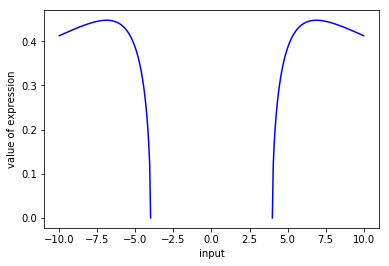

In [13]:
def y(w):
    return 2/abs(w)* np.log(abs(w)/2 *(1+ np.sqrt(1-4/abs(w))) -1)
data1 = np.linspace(-10, -4, 100)
data2 = np.linspace(4, 10, 100)
data = np.concatenate((data1, data2), axis=None)
out1 = y(data1)
out2 = y(data2)
plt.plot(data1, out1, "b-")
plt.plot(data2, out2, "b-")
plt.xlabel("input")
plt.ylabel("value of expression")

out= y(data)
print("when |w| = " + format(abs(data[np.argmax(out)]), '.2g') + ", the function has the max value: "+ str(np.amax(out)))
    

# Q2: Dropout

## Dataset

In [2]:
def GenerateDatasets(n): # n is the size of training set
    # 1D -> 1D (line mapping)
    n_input = 1
    n_output = 1
    noise = 0.5

    #np.random.seed(452)
    a = np.random.rand()/2.
    m = np.random.rand() + 0.5
    b = np.random.rand()-0.5

    def myfunc(x):
        return a*x**2 + m*x + b

    # Create a training dataset
    n_samples = n
    training_output = []
    training_input = []
    xv = np.linspace(-1, 1, n_samples)
    for idx in range(n_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx]
        t = myfunc(x) + np.random.normal(scale=noise)
        training_input.append(np.array([x]))
        training_output.append(np.array([t]))

    # Create a testing dataset
    test_input = []
    test_output = []
    n_test_samples = 300
    xv = np.linspace(-1, 1, n_test_samples)
    for idx in range(n_test_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx] #+ np.random.normal(scale=0.1)
        t = myfunc(x) + np.random.normal(scale=noise)
        test_input.append(np.array([x]))
        test_output.append(np.array([t]))


    train = [np.array(training_input), np.array(training_output)]
    test = [np.array(test_input), np.array(test_output)]
    return train, test

## Sample Code

In [3]:
# Here is an example, creating a Network object.
net = Network.Network(cost='cross-entropy')
net.AddLayer(Network.Layer(1))
net.AddLayer(Network.Layer(6, act='logistic'))
net.AddLayer(Network.Layer(1, act='logistic'))

In [4]:
# Generate the training and testing datasets
P = 5
train, test = GenerateDatasets(P)

In [5]:
# Train the network
progress = net.SGD(train[0], train[1], epochs=100, lrate=1.)

In [6]:
# Evaluate the cost 
print('Training cost = '+str(net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(net.Evaluate(test[0], test[1])))

# These results won't necessarily make sense, since the network model
# might not be the right choice for the dataset.

Training cost = 0.716252891820204
    Test cost = 0.5767459969033711


## 2 (a), (b), 3 (a) Completing the RobustNetwork Class

In [7]:
class RobustNetwork(Network.Network):
    
    def FeedForward(self, x, dropout=0):
        '''
            y = net.FeedForward(x, dropout=0)

            Runs the network forward, starting with x as input.
            However, a random subset of the hidden nodes are set to 0 activity.
            Returns the activity of the output layer.

            Inputs:
              x is a batch of inputs
              dropout is a probability that a node is dropped, in [0,1]
              
            Outputs:
              y is the batch of outputs (no dropout or the output layer)
        '''
        if dropout==0.:
            self.dropout_nonzero = False  # Internal flag for dropout
            super(RobustNetwork, self).FeedForward(x)
        else:
            self.dropout_nonzero = True   # Internal flag for dropout
            
            x = np.array(x)  # Convert input to array, in case it's not
            
            self.lyr[0].h = x # Set input layer
            
            self.mask = []  # mask will record which nodes were dropped
            self.mask.append(None)  # Input layer does not have dropout
            
            layers = 0
            
            # Loop over connections
            for pre,post,W in zip(self.lyr[:-1], self.lyr[1:], self.W):
                
                # Calc. input current to next layer
                post.z = pre.h @ W + post.b

                # Use activation function to get activities
                post.h = post.sigma(post.z)
                if layers != self.n_layers - 2:
                    mask = np.arange(post.N)
                    np.random.shuffle(mask)
                    for i in range(post.N):
                        if mask[i] >= (post.N * dropout):
                            mask[i] = 1
                        else:
                            mask[i] = 0
                    mask = mask/(1-dropout)
                    self.mask.append(mask)
                    post.h = post.h *mask
                layers += 1
        # Return activity of output layer
        return self.lyr[-1].h
    
    
    
    def BackProp(self, t, lrate=0.05, decay=0.):
        '''
            net.BackProp(targets, lrate=0.05)
            
            Given the current network state and targets t, updates the connection
            weights and biases using the backpropagation algorithm.
            
            Inputs:
             t      an array of targets (number of samples must match the
                    network's output)
             lrate  learning rate
             decay  is the coefficient for weight/bias decay
        '''
        if self.dropout_nonzero == False and decay == 0.:
            super(RobustNetwork, self).BackProp(t, lrate)
        else:
            t = np.array(t)  # convert t to an array, in case it's not
            # Error gradient for top layer
            dEdz = self.TopGradient(t)
            # Loop down through the layers
            for i in range(self.n_layers-2, -1, -1):
                pre = self.lyr[i]

                # Gradient w.r.t. weights
                dEdW = pre.h.T @ dEdz + 2 * decay* self.W[i]

                # Gradient w.r.t. biases
                dEdb = np.sum(dEdz, axis=0)
                # Project error gradient down to layer below.
                if i>0 and self.dropout_nonzero == True:
                    dEdz = ( dEdz @ self.W[i].T ) *self.mask[i] * pre.sigma_z_p(pre.z)

                # Update weights and biases
                self.W[i] -= lrate*dEdW
                self.lyr[i+1].b -= lrate*dEdb
    
    
    def SGD(self, inputs, targets, lrate=0.05, epochs=1, batch_size=10, decay=0, dropout=0):
        '''
            progress = net.SGD(inputs, targets, lrate=0.05, epochs=1, decay=0, dropout=0)

            Performs Stochastic Gradient Descent on the network.
            Run through the dataset in batches 'epochs' number of times, incrementing the
            network weights after each batch. For each epoch, it
            shuffles the dataset.

            Inputs:
              inputs  is an array of input samples
              targets is a corresponding array of targets
              lrate   is the learning rate (try 0.001 to 5)
              epochs  is the number of times to go through the training data
              decay   is the decay coefficient for the weights and biases
              dropout is the dropout probability
              
            Outputs:
              progress is an (expochs)x2 array with epoch in the first column, and 
                      cost in the second column
        '''
        loss_history = []
        for k in range(epochs):
            batches = Network.MakeBatches(inputs, targets, batch_size=batch_size, shuffle=True)
            for mini_batch in batches:
                self.FeedForward(mini_batch[0], dropout=dropout)
                self.BackProp(mini_batch[1], decay=decay)

            loss_history.append([k, self.Evaluate(inputs, targets)])

        return np.array(loss_history)


## (c) Create the Network

In [8]:
original_net = RobustNetwork("MSE")
original_net.AddLayer(Network.Layer(1))
original_net.AddLayer(Network.Layer(10, "arctan"))
original_net.AddLayer(Network.Layer(1, "identity"))
dropout_net = copy.deepcopy(original_net)

## (d) Train and Evaluate without dropout

In [12]:
train, test = GenerateDatasets(5)
print(train)
print(original_net.SGD(train[0], train[1], lrate=1, epochs=5000, batch_size=5, dropout=0))
print("Training Set \n" + "MSE: " + str(original_net.Evaluate(train[0], train[1])))
print("Test Set \n" + "MSE: " + str(original_net.Evaluate(test[0], test[1])))

[array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]]), array([[-1.05117397],
       [-0.62117558],
       [ 0.54462731],
       [ 0.60401149],
       [ 0.80294673]])]
[[0.00000000e+00 3.03641722e-01]
 [1.00000000e+00 2.96851856e-01]
 [2.00000000e+00 2.90929407e-01]
 ...
 [4.99700000e+03 1.54203892e-03]
 [4.99800000e+03 1.54151890e-03]
 [4.99900000e+03 1.54099909e-03]]
Training Set 
MSE: 0.0015409990915002574
Test Set 
MSE: 0.3484456158640893


## (e) Train and Evaluate with dropout

In [54]:
loss_history = dropout_net.SGD(train[0], train[1], lrate=1, epochs=5000, batch_size=5, dropout=0.2)
print("Training Set \n" + "MSE: " + str(dropout_net.Evaluate(train[0], train[1])))
print("Test Set \n" + "MSE: " + str(dropout_net.Evaluate(test[0], test[1])))

Training Set 
MSE: 0.12208649416031339
Test Set 
MSE: 0.2743630184788909


## (f) Plot training data and models

Text(0, 0.5, 'outputs')

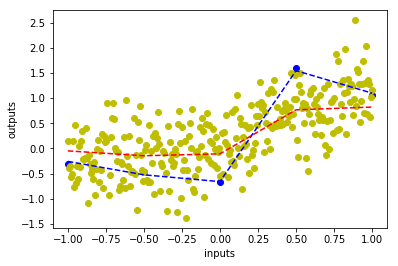

In [55]:
y1 = original_net.FeedForward(train[0])

y2 = dropout_net.FeedForward(train[0], 0.2)

plt.plot(train[0], train[1], "bo")
plt.plot(test[0], test[1], "yo")
plt.plot(train[0], y1, "b--")
plt.plot(train[0], y2, "r--")
plt.xlabel("inputs") 
plt.ylabel("outputs") 

## (g) Average performance over 10 datasets

In [56]:
arr = np.zeros((10, 3))
for i in range(10):
    original_net = RobustNetwork("MSE")
    original_net.AddLayer(Network.Layer(1))
    original_net.AddLayer(Network.Layer(10, "arctan"))
    original_net.AddLayer(Network.Layer(1, "identity"))
    dropout_net = copy.deepcopy(original_net)
    train2, test2 = GenerateDatasets(5)
    original_net.SGD(train2[0], train2[1], lrate=1, epochs=5000, batch_size=5)
    dropout_net.SGD(train2[0], train2[1], lrate=1, epochs=5000, batch_size=5, dropout=0.2)
    origin_cost = original_net.Evaluate(test2[0], test2[1])
    dropout_cost = dropout_net.Evaluate(test2[0], test2[1])
    arr[i][0] = i
    arr[i][1] = origin_cost
    arr[i][2] = dropout_cost
    print("Experiment #" + str(i) + ":  Original_net cost: "+str(origin_cost) + ", Dropout_net cost: "+ str(dropout_cost))

#print mean cost of both network
sum1 = 0
sum2 = 0
for row in arr:
    sum1 += row[1]
    sum2 += row[2]
mean1 = sum1/10
mean2 = sum2/10
print("mean cost of original_net for 10 runs: " + str(mean1))
print("mean cost of dropout_net for 10 runs: " + str(mean2))

Experiment #0:  Original_net cost: 0.5457636091126452, Dropout_net cost: 0.30467267322318775
Experiment #1:  Original_net cost: 0.4586553262378277, Dropout_net cost: 0.2723298021215559
Experiment #2:  Original_net cost: 0.5985352166874319, Dropout_net cost: 0.3111119504507439
Experiment #3:  Original_net cost: 0.6791551520172925, Dropout_net cost: 0.7902284750365052
Experiment #4:  Original_net cost: 0.5419246539902157, Dropout_net cost: 0.3301828697225028
Experiment #5:  Original_net cost: 0.4776315560755516, Dropout_net cost: 0.40007270023934577
Experiment #6:  Original_net cost: 0.7464609401328732, Dropout_net cost: 0.6656808717180293
Experiment #7:  Original_net cost: 0.36120366549684463, Dropout_net cost: 0.2817905094527241
Experiment #8:  Original_net cost: 0.28105649200878274, Dropout_net cost: 0.30380777055761055
Experiment #9:  Original_net cost: 0.4822005890643565, Dropout_net cost: 0.34288670795823273
mean cost of original_net for 10 runs: 0.5172587200823822
mean cost of dro

The dropout network is preferred based on the low mean cost. We adopt dropout network, since we train a bunch of different diminished network and combine them to form the final network, and dropout disallows sensitivity to particular combinations of nodes, so that the dropout network becomes more general and robust.

# Q3: Weight Decay

## (a) Implement weigth decay in BackProp (see code above)

## (b) Average performance over 10 datasets

In [116]:
arr = np.zeros((10, 3))
for i in range(10):
    original_net = RobustNetwork("MSE")
    original_net.AddLayer(Network.Layer(1))
    original_net.AddLayer(Network.Layer(10, "arctan"))
    original_net.AddLayer(Network.Layer(1, "identity"))
    decay_net = copy.deepcopy(original_net)
    train3, test3 = GenerateDatasets(5)
    original_net.SGD(train3[0], train3[1], lrate=1, epochs=5000, batch_size=5)
    decay_net.SGD(train3[0], train3[1], lrate=1, epochs=5000, batch_size=5, decay=0.0004)
    origin_cost = original_net.Evaluate(test3[0], test3[1])
    decay_cost = decay_net.Evaluate(test3[0], test3[1])
    arr[i][0] = i
    arr[i][1] = origin_cost
    arr[i][2] = decay_cost
    print("Experiment #" + str(i) + ":  Original_net cost: "+str(origin_cost) + ", Decay_net cost: "+ str(decay_cost))

#print mean cost of both network
sum1 = 0
sum2 = 0
for row in arr:
    sum1 += row[1]
    sum2 += row[2]
mean1 = sum1/10
mean2 = sum2/10
print("mean cost of original_net for 10 runs: " + str(mean1))
print("mean cost of decay_net for 10 runs: " + str(mean2))

Experiment #0:  Original_net cost: 0.317212881926184, Decay_net cost: 0.2858967458143252
Experiment #1:  Original_net cost: 0.4975392326912792, Decay_net cost: 0.4867500987756419
Experiment #2:  Original_net cost: 0.41539901237275073, Decay_net cost: 0.35614935060403924
Experiment #3:  Original_net cost: 0.4975712212479243, Decay_net cost: 0.33310978804135855
Experiment #4:  Original_net cost: 0.41042285133852524, Decay_net cost: 0.3788462341011196
Experiment #5:  Original_net cost: 0.4991094142224557, Decay_net cost: 0.3589486057812124
Experiment #6:  Original_net cost: 0.35739481499529213, Decay_net cost: 0.3521265408014899
Experiment #7:  Original_net cost: 0.4247001924177813, Decay_net cost: 0.2763159976837375
Experiment #8:  Original_net cost: 0.3767928575011165, Decay_net cost: 0.34270448113356844
Experiment #9:  Original_net cost: 0.6235870462645811, Decay_net cost: 0.4718841181227023
mean cost of original_net for 10 runs: 0.441972952497789
mean cost of decay_net for 10 runs: 0.

I prefer decay model. Based on the ten experiments above, Decay_net always has the less cost then original_net. Besides, based on research, the large weight in the trained network normally means the network is well specialized on the training data, leading to an overfitting, so that it is more sensitive to the noise in training data, making model unstable and ungeneral. Therefore, we use weight decay method to generate a small weight model.

# Q4: Classifier Networks

## Create and interesting dataset

In [12]:
def ClassPlot(x, y):
    # FeedForward
    yc = Network.OneHot(y)
    colour_options = ['y', 'b', 'r', 'g', 'k']
    cidx = np.argmax(yc, axis=1)
    colours = [colour_options[k] for k in cidx]
    plt.scatter(x[:,0],x[:,1], color=colours, marker='.')
    plt.axis('equal');

def GaussianCluster(mu, sa, N, theta=0.):
    theta_rad = theta/180*np.pi
    c, s = np.cos(theta_rad), np.sin(theta_rad)
    R = np.array([[c,-s],[s,c]])
    M = R @ np.diag(sa) @ R.T
    y = np.random.multivariate_normal(mu, M, N)
    return y

def CreateDataset(params):
    '''
        train, test = CreateDataset(params)
        
        Creates a dataset using a bunch of Gaussian clouds.
        
        Inputs:
          params is a list of 5-tuples. Each tuple (or list)
             describes a 2-D Gaussian cloud:
             1) the mean
             2) standard deviation along x and y directions
             3) rotation of cloud (degrees counter-clockwise)
             4) class index
             5) number of points
             
        Outputs:
          train is a list containing 2 arrays
             - the first array contains the training inputs,
               one per row
             - the second array contains the corresponding classes
          test has the same structure as train, but with
               half the number of samples
    '''
    train_inputs = []
    train_outputs = []
    test_inputs = []
    test_outputs = []
    all_c = [p[3] for p in params]
    n_classes = np.max(all_c)
    for p in params:
        xx = GaussianCluster(p[0], p[1], p[4], theta=p[2])
        yy = np.zeros((p[4], n_classes+1))
        yy[:,p[3]] = 1.
        train_inputs.append(xx)
        train_outputs.append(yy)
        xtest = GaussianCluster(p[0], p[1], int(p[4]/2), theta=p[2])
        ytest = np.zeros((int(p[4]/2), n_classes+1))
        ytest[:,p[3]] = 1.
        test_inputs.append(xtest)
        test_outputs.append(ytest)
    train = [np.vstack(train_inputs), np.vstack(train_outputs)]
    test = [np.vstack(test_inputs), np.vstack(test_outputs)]
    return train, test

# 0=y, 1=b, 2=r
params = [[[0.5, 0.5],   [0.025, 0.01],  -45, 0, 50],
          [[-0.5,-0.5],  [0.025, 0.01],  -45, 0, 50],
          [[-0.3,-0.35], [0.04,0.01],     10, 0, 80],
          [[0.6,0],      [0.01,0.01],      0, 0, 50],
          [[0.1,-0.04],  [0.1,0.005],     20, 0, 80],
          [[0.5,-0.5],   [0.02,0.01],     45, 1, 50],
          [[0,0.6],      [0.01,0.01],      0, 1, 50],
          [[-0.5,0.1],   [0.02,0.01],     30, 1, 80],
          [[-0.5,0.5],   [0.02,0.01],     45, 2, 50],
          [[0,-0.6],     [0.01,0.01],      0, 2, 50],
          [[0.2,0.3],    [0.01,0.004],     0, 2, 80],
          [[-0.2,0.37],  [0.02,0.005],   -30, 2, 50],
          [[0.25,-0.3],  [0.005,0.01],     0, 3, 60],
          [[-0.1,0.1],   [0.01,0.01],    -30, 3, 50]
         ]

In [44]:
train, test = CreateDataset(params)

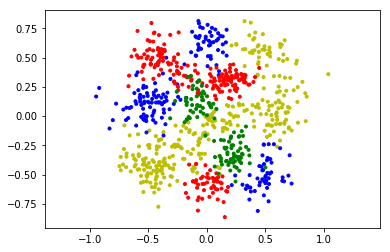

In [45]:
ClassPlot(train[0], train[1]);

## (a) Create and Evaluate a Neural Network

In [46]:
net = Network.Network("cross-entropy")
net.AddLayer(Network.Layer(2))
net.AddLayer(Network.Layer(10, "logistic"))
net.AddLayer(Network.Layer(4, "logistic"))
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)

## (b) Evaluate Model

0.5927710843373494


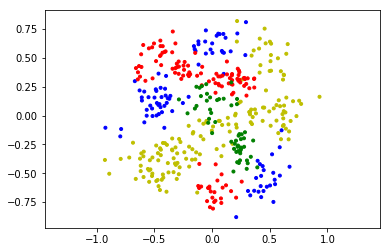

In [47]:
output = net.FeedForward(test[0])
print(str(Network.ClassificationAccuracy(output, test[1])))
ClassPlot(test[0], test[1]);

## (c) Crappy Network

In [48]:
net = Network.Network("MSE")
net.AddLayer(Network.Layer(2))
net.AddLayer(Network.Layer(10, "identity"))
net.AddLayer(Network.Layer(4, "identity"))
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)

0.5036144578313253


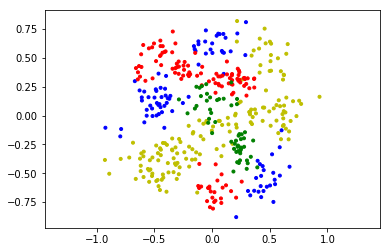

In [49]:
output = net.FeedForward(test[0])
print(str(Network.ClassificationAccuracy(output, test[1])))
ClassPlot(test[0], test[1]);